## Import Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.tools.eval_measures import rmse
import matplotlib.lines as mlines
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t


## Load Data

In [26]:
path = '/Users/alexaterrazas/Desktop/Lake Transfer Function Manuscript/'
df = pd.read_csv(path + 'ERA5_LakeTemp.csv')

## Simple linear regression: TF1

In [27]:
def plot_bestfit_slr(ax, season, xlabel):
    
    #plotting font and tick label sizes
    plt.rcParams['font.family'] = 'Arial'
    ax.tick_params(axis='both', which='major', labelsize=11)

    #colors used
    red = '#c1272d'
    gray = '#C0C0C0'
#     blue = plt.cm.tab10(0)
    blue = '#0077BB'
    
    #fontsize
    fs1 = 20
    fs2 = 20
    

    ####################################
    # fit a linear regression model to the data
    X = df[[season]]
    y = df['tas_ann_avg'] 

    X = sm.add_constant(X) 

    #MODEL
    model = sm.OLS(y, X).fit() 

    summary = model.summary()
    
  
    # statsmodel fitting
    st, data, ss2 = summary_table(model, alpha = 0.05)

    fittedvalues = data[:, 2]
    predict_mean_se = data[:, 3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
    predict_ci_low, predict_ci_upp = data[:, 6:8].T

    x = df[season]
    y = df['tas_ann_avg']
    
    #sort data
    sorted_data = pd.DataFrame({'x': x, 'y': y, 'trendline': fittedvalues,
                                'ci_low': predict_mean_ci_low, 'ci_upp': predict_mean_ci_upp,
                                'pi_low': predict_ci_low , 'pi_upp': predict_ci_upp 
                               }).sort_values(by='x')
    


    #prediction interval
    ax.fill_between(sorted_data['x'], sorted_data['pi_low'], sorted_data['pi_upp'], color = blue, edgecolor = 'k', linestyle = 'dashed', alpha = 0.2, label = '95% prediction interval')

    # Plot the lower prediction interval bound as a dashed line
    ax.plot(sorted_data['x'], sorted_data['pi_low'], linestyle='--', color=blue, label='_nolegend_', zorder = 1)

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(sorted_data['x'], sorted_data['pi_upp'], linestyle='--', color=blue, label='_nolegend_', zorder = 1)

    #confidence interval
#     ax.fill_between(sorted_data['x'], sorted_data['ci_low'], sorted_data['ci_upp'], color = 'k', alpha = 0.35, label = '95% confidence interval')
    ax.scatter(x, y, s = 60, marker = 'o',  color = 'gray', edgecolor = 'k', alpha = 0.25, linewidth = 0.5, zorder = 9)

    #fit
    fit = ax.plot(sorted_data['x'], sorted_data['trendline'], color = blue, linewidth = 4, label = 'This study', zorder=10)

    #x-label
    ax.set_xlabel(xlabel, fontsize=fs2)
    
    # rsquared
    r2 = model.rsquared.round(2)
    
    rmse_val = rmse(y, model.predict(X)).round(2)
    
    
    return fig, r2, rmse_val, summary    

## Polynomial Regression: TF 2

In [28]:
def plot_bestfit_polyr(ax, season, xlabel):
    
    #plotting font and tick label sizes
    plt.rcParams['font.family'] = 'Arial'
    ax.tick_params(axis='both', which='major', labelsize=11)

    #colors used
    blue = '#073980'
    red = '#EE7733'
    gray = '#696969'
       
    #fontsize
    fs1 = 20
    fs2 = 20
    

    ####################################
    
    df['Tw squared'] = np.power(df[season], 2)

    X = df[['Tw squared', season]]
    y = df['tas_ann_avg'] 
    X = sm.add_constant(X) 
    
    #MODEL
 
    model = sm.OLS(y, X).fit() 

    summary = model.summary()
    
  
    # statsmodel fitting
    st, data, ss2 = summary_table(model, alpha = 0.05)

    fittedvalues = data[:, 2]
    predict_mean_se = data[:, 3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
    predict_ci_low, predict_ci_upp = data[:, 6:8].T

    x = df[season]
    y = df['tas_ann_avg']
    
    #sort data
    sorted_data = pd.DataFrame({'x': x, 'y': y, 'trendline': fittedvalues,
                                'ci_low': predict_mean_ci_low, 'ci_upp': predict_mean_ci_upp,
                                'pi_low': predict_ci_low , 'pi_upp': predict_ci_upp 
                               }).sort_values(by='x')
    

    #scatter plot
#     ax.scatter(x, y, facecolors='w', s = 18, marker = 'o',  edgecolor = 'k', alpha=0.2, linewidth = 0.5, zorder = 2)

    #prediction interval
    ax.fill_between(sorted_data['x'], sorted_data['pi_low'], sorted_data['pi_upp'], color = red, edgecolor = 'k', linestyle = 'dashed', alpha = 0.2, label = '95% prediction interval')

    # Plot the lower prediction interval bound as a dashed line
    ax.plot(sorted_data['x'], sorted_data['pi_low'], linestyle='--', color=red, label='_nolegend_', zorder = 1)

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(sorted_data['x'], sorted_data['pi_upp'], linestyle='--', color=red, label='_nolegend_', zorder = 1)

    #confidence interval
#     ax.fill_between(sorted_data['x'], sorted_data['ci_low'], sorted_data['ci_upp'], color = 'k', alpha = 0.35, label = '95% confidence interval')
#     ax.scatter(df[season], y, s = 60, marker = 'o',  color = 'gray', alpha = 0.20, linewidth = 0.5, zorder = 5)

    #fit
    fit = ax.plot(sorted_data['x'], sorted_data['trendline'], color = red, linewidth = 4, label = 'This study', zorder=10)

    #x-label
    ax.set_xlabel(xlabel, fontsize=fs2)
    
    # rsquared
    r2 = model.rsquared.round(2)
    
    rmse_val = rmse(y, model.predict(X)).round(2)
    
    
    return fig, r2, rmse_val, summary

## Hren and Sheldon, 2012

In [29]:
# Define the function with condition
def hs_annual(x):
    return (-0.0318) * np.power(x, 2) + (2.195 * x) - 12.607

def plot_hs_ann(ax):
    gray = '#4CBB17'
    red = '#c1272d'

 
    x_annual = df['lswt_ann_avg']
    y_actual = df['tas_ann_avg']

    # create a range of x-values to make predictions on, within the valid range
    x_pred = np.linspace(5, 30, 100)
    
    y_pred = hs_annual(x_annual)
    
    r2 = r2_score(y_actual, y_pred)
    rmse_val = np.sqrt(mean_squared_error(y_actual, y_pred))

    # use the function to make predictions
    y_pred = hs_annual(x_pred)
   
    # calculate the standard deviation of the residuals
    residuals = y_actual - hs_annual(x_annual)
    std_resid = np.sqrt(np.sum(np.power(residuals, 2)) / (len(x_annual) - 2))

    # calculate the t-value for the desired confidence level
    t_value = t.ppf(0.975, len(x_annual) - 2)

    # calculate the confidence interval
    mean_x = np.mean(x_annual)
    var_x = np.var(x_annual, ddof=1)
    conf_int = t_value * std_resid * np.sqrt(1 + 1/len(x_annual) + np.power((x_pred - mean_x), 2) / ((len(x_annual) - 1) * var_x))

    # calculate the prediction interval
    pred_int = t_value * std_resid * np.sqrt(1 + 1/len(x_annual) + np.power((x_pred - mean_x), 2) / ((len(x_annual) - 1) * var_x)) * np.sqrt(1 + 1/len(x_annual))

    # plot the function, the predicted values, the confidence interval, and the prediction interval
    ax.plot(x_pred, y_pred, color = 'k', label='Function', zorder = 10, linewidth = 4)
    ax.fill_between(x_pred, y_pred - pred_int, y_pred + pred_int, alpha=0.15, label='95% Prediction Interval', color = plt.cm.tab10(7))
    
    # Plot the lower prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred - pred_int, linestyle='--', label='_nolegend_', color = 'k')

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred + pred_int, linestyle='--', label='_nolegend_', color = 'k')

    return ax, r2, rmse_val

In [30]:
# Define the function with condition
def hs_AO(x):
    return (-0.0146) * np.power(x, 2) + (1.753 * x) - 16.079

def plot_hs_AO(ax):
    gray = '#808080'
    red = '#c1272d'

    x_ao = df['lswt_ao_avg']
    y_actual = df['tas_ann_avg']

    # create a range of x-values to make predictions on, within the valid range
    x_pred = np.linspace(6, 31, 100)

    y_pred = hs_AO(x_ao)
    
    r2 = r2_score(y_actual, y_pred)
    
    rmse_val = np.sqrt(mean_squared_error(y_actual, y_pred))

    # use the function to make predictions
    y_pred = hs_AO(x_pred)

    # calculate the standard deviation of the residuals
    residuals = y_actual - hs_AO(x_ao)
    std_resid = np.sqrt(np.sum(np.power(residuals, 2)) / (len(x_ao) - 2))

    # calculate the t-value for the desired confidence level
    t_value = t.ppf(0.975, len(x_ao) - 2)

    # calculate the confidence interval
    mean_x = np.mean(x_ao)
    var_x = np.var(x_ao, ddof=1)
    conf_int = t_value * std_resid * np.sqrt(1 + 1/len(x_ao) + np.power((x_pred - mean_x), 2) / ((len(x_ao) - 1) * var_x))

    # calculate the prediction interval
    pred_int = t_value * std_resid * np.sqrt(1 + 1/len(x_ao) + np.power((x_pred - mean_x), 2) / ((len(x_ao) - 1) * var_x)) * np.sqrt(1 + 1/len(x_ao))

    # plot the function, the predicted values, the confidence interval, and the prediction interval
    ax.plot(x_pred, y_pred, color = 'k', label='Function', zorder = 10, linewidth = 4)
    ax.fill_between(x_pred, y_pred - pred_int, y_pred + pred_int, alpha=0.15, label='95% Prediction Interval', color = plt.cm.tab10(7))
    
    # Plot the lower prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred - pred_int, linestyle='--', label='_nolegend_', color = 'k')

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred + pred_int, linestyle='--', label='_nolegend_', color = 'k')

    return ax, r2, rmse_val

In [31]:
def hs_AMJ(x):
    return (-0.0097) * np.power(x, 2) + (1.379 * x) - 8.227

def plot_hs_AMJ(ax):
    gray = '#808080'
    red = '#c1272d'
    orange = '#F28C28'

    x_amj = df['lswt_amj_avg']
    y_actual = df['tas_ann_avg']

    y_pred = hs_AMJ(x_amj)
    
    r2 = r2_score(y_actual, y_pred)
    
    rmse_val = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Create a range of x-values to make predictions on, within the valid range
    x_pred = np.linspace(2, 29, 100)

    # Use the function to make predictions
    y_pred = hs_AMJ(x_pred)
    
    # Calculate the standard deviation of the residuals
    residuals = y_actual - hs_AMJ(x_amj)
    std_resid = np.sqrt(np.sum(np.power(residuals, 2)) / (len(x_amj) - 2))

    # Calculate the t-value for the desired confidence level
    t_value = t.ppf(0.975, len(x_amj) - 2)

    # Calculate the confidence interval
    mean_x = np.mean(x_amj)
    var_x = np.var(x_amj, ddof=1)
    conf_int = t_value * std_resid * np.sqrt(1 + 1/len(x_amj) + np.power((x_pred - mean_x), 2) / ((len(x_amj) - 1) * var_x))

    # Calculate the prediction interval
    pred_int = t_value * std_resid * np.sqrt(1 + 1/len(x_amj) + np.power((x_pred - mean_x), 2) / ((len(x_amj) - 1) * var_x)) * np.sqrt(1 + 1/len(x_amj))

    # Plot the function, the predicted values, the confidence interval, and the prediction interval
    ax.plot(x_pred, y_pred, color = 'k', label='Function', zorder = 10, linewidth = 4)
    ax.fill_between(x_pred, y_pred - pred_int, y_pred + pred_int, alpha=0.2, label='95% Prediction Interval', color = plt.cm.tab10(7), zorder = 0)
    
    # Plot the lower prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred - pred_int, linestyle='--', label='_nolegend_', color ='k')

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred + pred_int, linestyle='--', label='_nolegend_', color = 'k')

    return ax, r2, rmse_val

In [32]:
def hs_JJA(x):
    return (-0.0055) * np.power(x, 2) + (1.476 * x) - 18.915

def plot_hs_JJA(ax):
    gray = '#808080'
    red = '#c1272d'


    x_jja = df['lswt_jja_avg']
    y_actual = df['tas_ann_avg']

    y_pred = hs_JJA(x_jja)
    
    r2 = r2_score(y_actual, y_pred)

    rmse_val = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Create a range of x-values to make predictions on, within the valid range
    x_pred = np.linspace(9, 34, 100)

    # Use the function to make predictions
    y_pred = hs_JJA(x_pred)
   
    # Calculate the standard deviation of the residuals
    residuals = y_actual - hs_JJA(x_jja)
    std_resid = np.sqrt(np.sum(np.power(residuals, 2)) / (len(x_jja) - 2))

    # Calculate the t-value for the desired confidence level
    t_value = t.ppf(0.975, len(x_jja) - 2)

    # Calculate the confidence interval
    mean_x = np.mean(x_jja)
    var_x = np.var(x_jja, ddof=1)
    conf_int = t_value * std_resid * np.sqrt(1 + 1/len(x_jja) + np.power((x_pred - mean_x), 2) / ((len(x_jja) - 1) * var_x))

    # Calculate the prediction interval
    pred_int = t_value * std_resid * np.sqrt(1 + 1/len(x_jja) + np.power((x_pred - mean_x), 2) / ((len(x_jja) - 1) * var_x)) * np.sqrt(1 + 1/len(x_jja))

    # Plot the function, the predicted values, the confidence interval, and the prediction interval
    ax.plot(x_pred, y_pred, color = 'k', label='Function', zorder = 10, linewidth = 4)
    ax.fill_between(x_pred, y_pred - pred_int, y_pred + pred_int, alpha=0.15, label='95% Prediction Interval', color = plt.cm.tab10(7))
    
    # Plot the lower prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred - pred_int, linestyle='--', label='_nolegend_', color = 'k')

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred + pred_int, linestyle='--', label='_nolegend_', color = 'k')
    
    return ax, r2, rmse_val

In [33]:
def hs_Warmest(x):
    return (x/0.562) - (17.3/0.562)

def plot_hs_Warmest(ax):
    gray = '#808080'
    red = '#c1272d'

    x_Warmest = df['lswt_warmest_avg']
    y_actual = df['tas_ann_avg']

    y_pred = hs_Warmest(x_Warmest)
    
    r2 = r2_score(y_actual, y_pred)

    rmse_val = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Create a range of x-values to make predictions on, within the valid range
    x_pred = np.linspace(9, 35, 100)

    # Use the function to make predictions
    y_pred = hs_Warmest(x_pred)
   
    # Calculate the standard deviation of the residuals
    residuals = y_actual - hs_Warmest(x_Warmest)
    std_resid = np.sqrt(np.sum(np.power(residuals, 2)) / (len(x_Warmest) - 2))

    # Calculate the t-value for the desired confidence level
    t_value = t.ppf(0.975, len(x_Warmest) - 2)

    # Calculate the confidence interval
    mean_x = np.mean(x_Warmest)
    var_x = np.var(x_Warmest, ddof=1)
    conf_int = t_value * std_resid * np.sqrt(1 + 1/len(x_Warmest) + np.power((x_pred - mean_x), 2) / ((len(x_Warmest) - 1) * var_x))

    # Calculate the prediction interval
    pred_int = t_value * std_resid * np.sqrt(1 + 1/len(x_Warmest) + np.power((x_pred - mean_x), 2) / ((len(x_Warmest) - 1) * var_x)) * np.sqrt(1 + 1/len(x_Warmest))

    # Plot the function, the predicted values, the confidence interval, and the prediction interval
    ax.plot(x_pred, y_pred, color = 'k', label='Function', zorder = 10, linewidth = 4)
    ax.fill_between(x_pred, y_pred - pred_int, y_pred + pred_int, alpha=0.15, label='95% Prediction Interval', color = plt.cm.tab10(7))
    
    # Plot the lower prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred - pred_int, linestyle='--', label='_nolegend_', color = 'k')

    # Plot the upper prediction interval bound as a dashed line
    ax.plot(x_pred, y_pred + pred_int, linestyle='--', label='_nolegend_', color = 'k')
    
    return ax, r2, rmse_val

## Figure 3 a-e

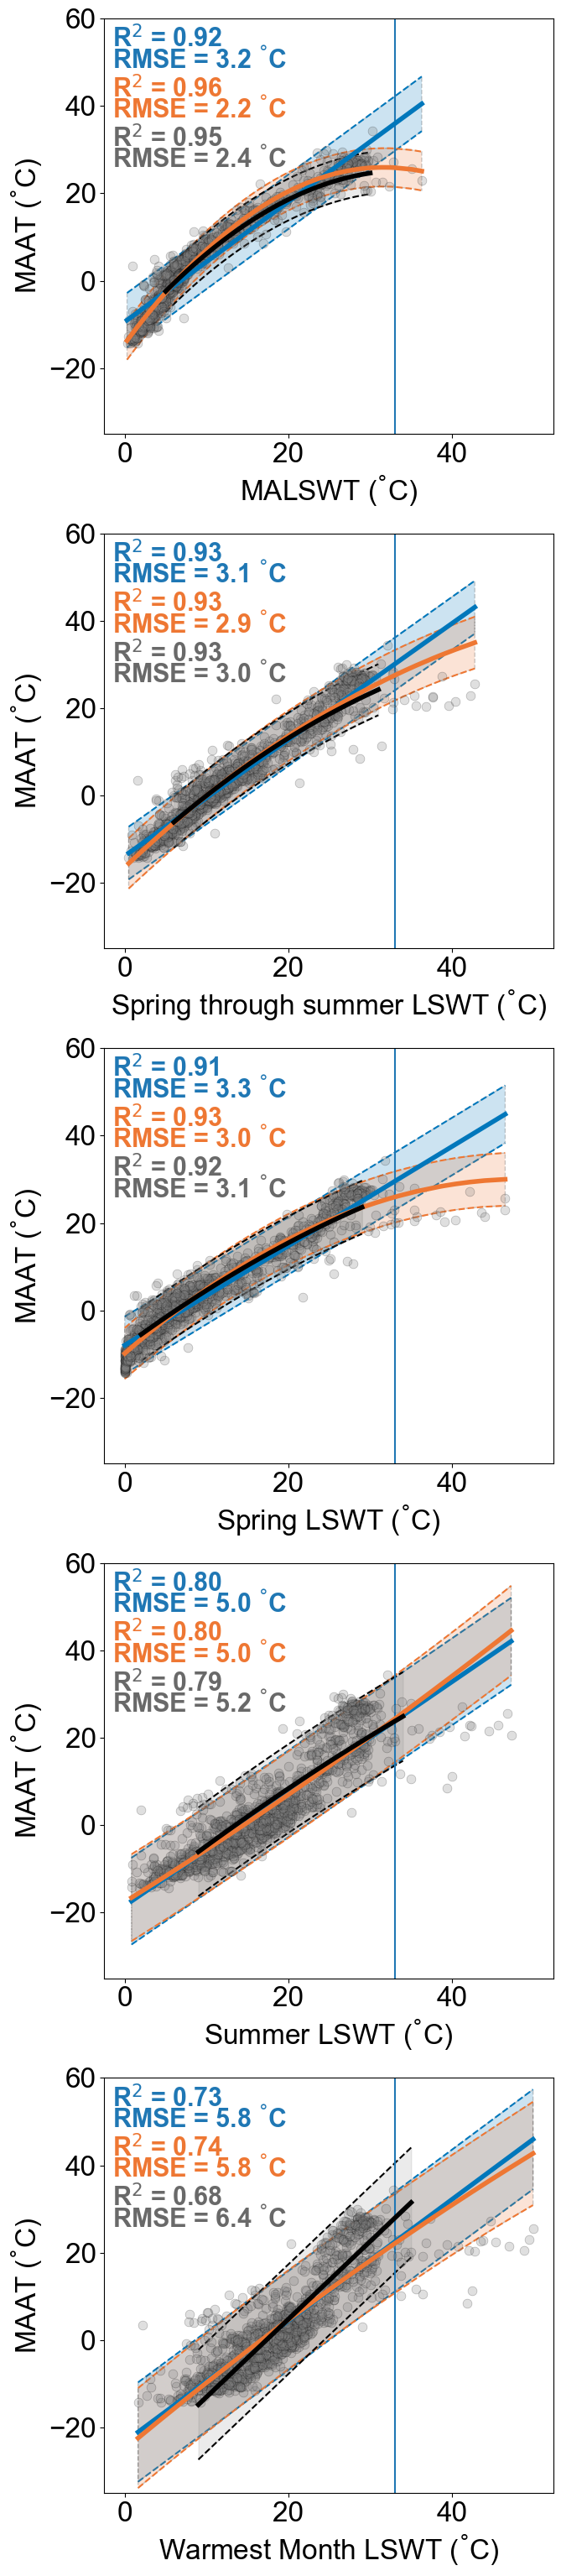

In [34]:
fs = 22
fs2 = 24
blue = plt.cm.tab10(0)
red = '#EE7733'
gray = '#C0C0C0'


def legend_plots():
    
    blue = plt.cm.tab10(0)
    red = '#EE7733'
    gray = 'k'
    
    # Define the line types for the legend
    linear_fit = mlines.Line2D([0, 1], [0, 1], color = blue, linestyle = 'solid', linewidth = 4)
    quad_fit = mlines.Line2D([0, 1], [0, 1], color = red, linestyle = 'solid', linewidth = 4)
    hs_fit = mlines.Line2D([0, 1], [1, 0], color = gray, linestyle = 'solid', linewidth = 4)
    
    # Define the scatter point for the legend with a specific edge color
    scatter_marker = mlines.Line2D([], [], marker='o', markerfacecolor='gray', markeredgecolor='k', linestyle='None', markersize=10, alpha = 0.25, label='Scatter Point')
    
    # Create the legend with the custom artist, including the scatter marker
    ax[1, 2].legend(handles=[scatter_marker, linear_fit, quad_fit, hs_fit], 
                    labels=['LakeTEMP Lakes', 'Transfer Function 1', 'Transfer Function 2', 'Hren and Sheldon (2012)'],
                    loc='center', bbox_to_anchor=(0.55, 0.5), frameon=False, fontsize=24)

    return

######################################
fig, ax = plt.subplots(5,1, figsize = (8, 32), sharex=True, sharey = True)

slr_result_ann = plot_bestfit_slr(ax[0], 'lswt_ann_avg', '')
slr_result_ao = plot_bestfit_slr(ax[1], 'lswt_ao_avg', '')
slr_result_amj = plot_bestfit_slr(ax[2], 'lswt_amj_avg', '')
slr_result_jja = plot_bestfit_slr(ax[3], 'lswt_jja_avg', '')
slr_result_warmest = plot_bestfit_slr(ax[4], 'lswt_warmest_avg', '')


polyr_result_ann = plot_bestfit_polyr(ax[0], 'lswt_ann_avg', 'MALSWT')
polyr_result_ao = plot_bestfit_polyr(ax[1], 'lswt_ao_avg', 'AO')
polyr_result_amj = plot_bestfit_polyr(ax[2], 'lswt_amj_avg', 'AMJ')
polyr_result_jja = plot_bestfit_polyr(ax[3], 'lswt_jja_avg', 'JJA')
polyr_result_warmest = plot_bestfit_polyr(ax[4], 'lswt_warmest_avg', 'Warmest')

hs_result_ann = plot_hs_ann(ax[0])
hs_result_ao = plot_hs_AO(ax[1])
hs_result_amj = plot_hs_AMJ(ax[2])
hs_result_jja = plot_hs_JJA(ax[3])
hs_result_Warmest = plot_hs_Warmest(ax[4])


################################
slr_r2_ann = slr_result_ann[1]
slr_r2_ao = slr_result_ao[1]
slr_r2_amj = slr_result_amj[1]
slr_r2_jja = slr_result_jja[1]
slr_r2_warmest = slr_result_warmest[1]

slr_rmse_ann = slr_result_ann[2]
slr_rmse_ao = slr_result_ao[2]
slr_rmse_amj = slr_result_amj[2]
slr_rmse_jja = slr_result_jja[2]
slr_rmse_warmest = slr_result_warmest[2]

####
polyr_r2_ann = polyr_result_ann[1]
polyr_r2_ao = polyr_result_ao[1]
polyr_r2_amj = polyr_result_amj[1]
polyr_r2_jja = polyr_result_jja[1]
polyr_r2_warmest = polyr_result_warmest[1]

polyr_rmse_ann = polyr_result_ann[2]
polyr_rmse_ao = polyr_result_ao[2]
polyr_rmse_amj = polyr_result_amj[2]
polyr_rmse_jja = polyr_result_jja[2]
polyr_rmse_warmest = polyr_result_warmest[2]

###
hs_r2_ann = hs_result_ann[1]
hs_r2_ao = hs_result_ao[1]
hs_r2_amj = hs_result_amj[1]
hs_r2_jja = hs_result_jja[1]
hs_r2_Warmest = hs_result_Warmest[1]

hs_rmse_ann = hs_result_ann[2]
hs_rmse_ao = hs_result_ao[2]
hs_rmse_amj = hs_result_amj[2]
hs_rmse_jja = hs_result_jja[2]
hs_rmse_Warmest = hs_result_Warmest[2]



#####################

ax[0].annotate(f'R$^2$ = {slr_r2_ann:.2f}', (0.018, 0.93), xycoords = 'axes fraction', fontsize = fs, color = blue, fontweight='bold')
ax[1].annotate(f'R$^2$ = {slr_r2_ao:.2f}', (0.018,  0.93), xycoords = 'axes fraction', fontsize = fs, color = blue, fontweight='bold')
ax[2].annotate(f'R$^2$ = {slr_r2_amj:.2f}', (0.018, 0.93), xycoords = 'axes fraction', fontsize = fs, color = blue, fontweight='bold')
ax[3].annotate(f'R$^2$ = {slr_r2_jja:.2f}', (0.018,  0.93), xycoords = 'axes fraction', fontsize = fs, color = blue, fontweight='bold')
ax[4].annotate(f'R$^2$ = {slr_r2_warmest:.2f}', (0.018, 0.93), xycoords = 'axes fraction', fontsize = fs, color = blue, fontweight='bold')

ax[0].annotate(f'RMSE = {slr_rmse_ann:.1f} $^\degree$C', (0.018, 0.88), xycoords='axes fraction', fontsize=fs, color=blue, fontweight='bold')
ax[1].annotate(f'RMSE = {slr_rmse_ao:.1f} $^\degree$C', (0.018, 0.88), xycoords='axes fraction', fontsize=fs, color=blue, fontweight='bold')
ax[2].annotate(f'RMSE = {slr_rmse_amj:.1f} $^\degree$C', (0.018, 0.88), xycoords='axes fraction', fontsize=fs, color=blue, fontweight='bold')
ax[3].annotate(f'RMSE = {slr_rmse_jja:.1f} $^\degree$C', (0.018, 0.88), xycoords='axes fraction', fontsize=fs, color=blue, fontweight='bold')
ax[4].annotate(f'RMSE = {slr_rmse_warmest:.1f} $^\degree$C', (0.018, 0.88), xycoords='axes fraction', fontsize=fs, color=blue, fontweight='bold')

###
ax[0].annotate(f'R$^2$ = {polyr_r2_ann:.2f}', (0.018, 0.81), xycoords='axes fraction', fontsize=fs, color = red, fontweight='bold')
ax[1].annotate(f'R$^2$ = {polyr_r2_ao:.2f}', (0.018, 0.81), xycoords='axes fraction', fontsize=fs, color =red, fontweight='bold')
ax[2].annotate(f'R$^2$ = {polyr_r2_amj:.2f}', (0.018, 0.81), xycoords='axes fraction', fontsize=fs, color = red, fontweight='bold')
ax[3].annotate(f'R$^2$ = {polyr_r2_jja:.2f}', (0.018, 0.81), xycoords='axes fraction', fontsize=fs, color = red, fontweight='bold')
ax[4].annotate(f'R$^2$ = {polyr_r2_warmest:.2f}', (0.018, 0.81), xycoords='axes fraction', fontsize=fs, color = red,fontweight='bold')

ax[0].annotate(f'RMSE = {polyr_rmse_ann:.1f} $^\degree$C', (0.018, 0.76), xycoords='axes fraction', fontsize=fs, color=red, fontweight='bold')
ax[1].annotate(f'RMSE = {polyr_rmse_ao:.1f} $^\degree$C', (0.018, 0.76), xycoords='axes fraction', fontsize=fs, color=red, fontweight='bold')
ax[2].annotate(f'RMSE = {polyr_rmse_amj:.1f} $^\degree$C', (0.018, 0.76), xycoords='axes fraction', fontsize=fs, color=red ,fontweight='bold')
ax[3].annotate(f'RMSE = {polyr_rmse_jja:.1f} $^\degree$C', (0.018, 0.76), xycoords='axes fraction', fontsize=fs, color=red, fontweight='bold')
ax[4].annotate(f'RMSE = {polyr_rmse_warmest:.1f} $^\degree$C', (0.018, 0.76), xycoords='axes fraction', fontsize=fs, color=red, fontweight='bold')

###
ax[0].annotate(f'R$^2$ = {hs_r2_ann:.2f}', (0.018, 0.69), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[1].annotate(f'R$^2$ = {hs_r2_ao:.2f}', (0.018, 0.69), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[2].annotate(f'R$^2$ = {hs_r2_amj:.2f}', (0.018, 0.69), xycoords='axes fraction', fontsize=fs, color ='#696969', fontweight='bold')
ax[3].annotate(f'R$^2$ = {hs_r2_jja:.2f}', (0.018, 0.69), xycoords='axes fraction', fontsize=fs, color ='#696969', fontweight='bold')
ax[4].annotate(f'R$^2$ = {hs_r2_Warmest:.2f}', (0.018, 0.69), xycoords='axes fraction', fontsize=fs, color ='#696969', fontweight='bold')

ax[0].annotate(f'RMSE = {hs_rmse_ann:.1f} $^\degree$C', (0.018, 0.64), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[1].annotate(f'RMSE = {hs_rmse_ao:.1f} $^\degree$C', (0.018, 0.64), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[2].annotate(f'RMSE = {hs_rmse_amj:.1f} $^\degree$C', (0.018, 0.64), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[3].annotate(f'RMSE = {hs_rmse_jja:.1f} $^\degree$C', (0.018, 0.64), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')
ax[4].annotate(f'RMSE = {hs_rmse_Warmest:.1f} $^\degree$C', (0.018, 0.64), xycoords='axes fraction', fontsize=fs, color='#696969', fontweight='bold')

####################################
ax[0].set_xlabel('MALSWT ($^\degree$C)', fontsize=fs2)
ax[1].set_xlabel('Spring through summer LSWT ($^\degree$C)', fontsize=fs2)
ax[2].set_xlabel('Spring LSWT ($^\degree$C)', fontsize=fs2)
ax[3].set_xlabel('Summer LSWT ($^\degree$C)', fontsize=fs2)
ax[4].set_xlabel('Warmest Month LSWT ($^\degree$C)', fontsize=fs2)
# ax[0,0].set_xlabel('Spring LSWT ($^\degree$C)', fontsize=fs2)

ax[0].set_ylabel('MAAT ($^\degree$C)', fontsize=fs2)
ax[1].set_ylabel('MAAT ($^\degree$C)', fontsize=fs2)
ax[2].set_ylabel('MAAT ($^\degree$C)', fontsize=fs2)
ax[3].set_ylabel('MAAT ($^\degree$C)', fontsize=fs2)
ax[4].set_ylabel('MAAT ($^\degree$C)', fontsize=fs2)


for ax_col in ax:  # Iterate over each subplot
    ax_col.tick_params(axis='both', which='major', labelsize=24)
    ax_col.xaxis.set_tick_params(labelbottom=True)  # Ensure x-tick labels are enabled


ax[0].set_ylim(-35, 60)
ax[1].set_ylim(-35, 60)
ax[2].set_ylim(-35, 60)
ax[3].set_ylim(-35, 60)
ax[4].set_ylim(-35, 60)

ax[0].axvline(33,0)  
ax[1].axvline(33,0)    
ax[2].axvline(33,0)    
ax[3].axvline(33,0)    
ax[4].axvline(33,0)    

# ax[1, 2].axis('off')
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 50


# legend_plots()
plt.tight_layout()
plt.subplots_adjust(hspace=0.24)  # Adjust the vertical space between subplots

# plt.savefig('revised_fig4.png', dpi=300, bbox_inches = 'tight')
